# Step forcing

Here is one of our basic building blocks for discontinuous phenomena.

(definition-firstlin-unitstep)=

::::{proof:definition} Unit step function 
The {term}`unit step function` or {term}`Heaviside function` $H(t)$ is defined to have zero for $t< 0$ and one for $t\ge 0$. That is, if $T$ is any nonnegative constant, then

$$
H(t-T) = \begin{cases}  
0, & \text{if $t<T$,}\\ 
1, & \text{if $t\ge T$.}
\end{cases}
$$
::::

:::{note}
Another common notation for the unit step function is $u(t)$. You will also sometimes see $u_T(t)$ to mean $u(t-T)$.
:::

:::{note}
In this part of the course we will be considering problems with initial condition given at $t=0$. In that context there is really no difference between $H(t)$ and the constant function 1. It's mostly $H(t-T)$ for $T>0$ that is of interest.
:::

The unit step function represents throwing on an idealized switch, with the value $T$ representing the start time. If we want to use a more general forcing function $f(t)$ that is absent until the start time, we use

$$
f(t-T)H(t-T).
$$

This contributes nothing up to time $T$, at which point $f$ begins as though it is starting from time zero.

It can also be useful for a switch that is on for only a limited time.

````{proof:definition} Window function
A {term}`window function` is the function that is one within a given interval and zero outside of it. Specifically, the function

$$
H(t-S) - H(t-T)
$$

is equal to 1 for $S\le t < T$ and 0 elsewhere.
````

::::{admonition} Example
:class: tip

Use step functions to express 

$$
f(t) = \begin{cases}
7, & 0 \le t < 2, \\
\sin(t), & 2 \le t \lt 5, \\
e^t, & t \ge 5.
\end{cases}
$$

:::{dropdown} Solution
The key is to multiply each piecewise part of the definition of $f$ by its corresponding window function:

$$
f(t) = 7 \left[ H(t-0) - H(t-2) \right] + \sin(t)\, [ H(t-2)-H(t-5) ] + e^t\, [H(t-5)].
$$

Note that the last "window," which extends to infinity, never actually closes, so it's just a lone step up. Keeping in mind that $H(t)=1$ for all $t\ge 0$,this expression can be rearranged into

$$
f(t) = 7 + H(t-2)\, [\sin(t)-7] + H(t-5)\, [e^t - \sin(t)].
$$

For material that is coming, this later form is usually more convenient.
:::
::::


## Piecewise constant forcing

Here is a key fact about step forcing in a first-order ODE.

``` {proof:property} 1st order ODE with step forcing
If $x(t)$ solves $x'-a(t)x=H(t-T)f(t-T)$, where $a(t)$ and $f(t)$ are continuous, then $x(t)$ is continuous.
```

:::{note}
While $x(t)$ is continuous, $x'(t)$ is not. The ODE itself tells us that $x'$ has a jump discontinuity at $t=T$.
:::

Consider problems $x'-ax=f(t)$ with $x(0)=x_0$, in which $a$ is constant and the forcing is piecewise constant. That is,

``` {math}
:label: steps-pwc-forcing
x'-ax = k_1 H(t-T_1) + k_2 H(t-T_2) + \cdots + k_m H(t-T_m),
```

where the subscripted quantities are constants. Returning to our operator notation $\opA[x]=x'-ax$, we can exploit linearity. Define

\begin{align*}
\opA[x_h] &= 0, \quad x_h(0)=x_0 , \\
\opA[x_1] & = H(t-T_1),\quad x_1(0)=0, \\
& \vdots \\
\opA[x_m] & = H(t-T_m),\quad  x_m(0)=0. \\
\end{align*}

Then we set

$$
x(t)=x_h(t)+k_1 x_1(t) + \cdots +k_m x_m(t).
$$

As a result, $x(0)=x_0+0+\cdots+0=x_0$, so $x$ satisfies the initial condition. Furthermore,

\begin{align*}
\opA[x] & = \opA[x_h] & + & \,  k_1 \opA[x_1] + & \cdots   + & \, k_m \opA[x_m] \\
        & = 0         & + & \,  k_1H(t-T_t) + & \cdots   + & \, k_mH(t-T_m),  
\end{align*}

which shows that $x$ solves the original ODE {eq}`steps-pwc-forcing`. This technique of adding together solutions to linear equations is called {term}`superposition`.

Really there are only two unique subproblems to solve. One of these is the homogeneous case with nonzero initial condition:

$$
\opA[x_h] = 0, \quad x_h(0)=x_0.
$$

By now we know the solution here is $x_h(t)=e^{a t}x_0$. The other type of subproblem is

$$
\opA[x_j] = H(t-T_j),\quad x_j(0)=0.
$$

For $0\le t \le T_j$ the forcing is zero, so $x_j(t)= 0e^{at}=0$ zero for this interval. Beginning at $T_j$ we have

``` {math}
\opA[x_j]=1, \quad x_j(T_j)=0.
```

This can be solved easily using undetermined coefficients or variation of parameters, with the result $x_j(t)=(e^{a (t-T_j)} - 1)/a$ for $t > T_j$. Putting both time intervals together, we get

``` {math}
x_j(t) = \frac{1}{a} H(t-T_j)\cdot  \bigl(e^{a(t-T_j)} - 1\bigr).
```

Putting all this together, we get a complete formula.

````{proof:formula} Piecewise constant forcing, 1st order
The solution of {eq}`steps-pwc-forcing` is

``` {math}
:label: steps-pwc-solution
x(t) = e^{a t}x_0 + \frac{1}{a} \sum_{j=1}^m H(t-T_j)\cdot \bigl(e^{a(t-T_j)} - 1\bigr).
```

````

::::{admonition} Example
:class: tip
Solve $x'-\frac{1}{10}x=w(t)$, $x(0)=-2$, where $w(t)$ is a function that is 5 for $3 < t \le 6$ and zero elsewhere.

:::{dropdown} Solution
We can write the problem as

``` {math}
x' - \frac{1}{10}x = 5[H(t-3) - H(t-6)] = 5H(t-3) - 5H(t-6), \quad x(0)=-2.
```

The solution therefore consists of three terms,

```{math}
x(t) = -2 e^{t/10} + 50 \left[ H(t-3) (e^{(t-3)/10}-1) - H(t-6)(e^{(t-6)/10}-1) \right].
```

A more traditional piecewise expression of the solution is

```{math}
x(t) = \begin{cases} 
-2e^{t/10}, & 0 \le t < 3, \\ 
-2e^{t/10} + 50(e^{(t-3)/10}-1), & 3 \le < 5, \\ 
-2e^{t/10} + 50(e^{(t-3)/10}-e^{(t-6)/10}), & 5 \le t.
\end{cases}
```
:::
::::

::::{admonition} Example
:class: tip

Let the serum drug concentration in a patient be $x(t)$. Suppose this is initially zero when an IV is given at a constant rate of 12 units per hour for 30 minutes. An IVP that models this case is

```{math}
x'=-r x + 12 \left[ 1-H(t-0.5) \right], \quad x(0)=0,
```

where $t$ is measured in hours. Solve it to find the concentration of the drug over time.

:::{dropdown} Solution
We can solve this IVP using three pieces. The homogeneous solution with initial condition is $x_h(t)=0$, so it contributes nothing. The other two are due to the forcing terms:

\begin{align*}
x_1(t) & = \frac{1}{-r} H(t-0) \bigl(e^{-r(t-0)} - 1\bigr) = \frac{1}{r} \bigl(1- e^{-r t}\bigr), \\
x_2(t) & = \frac{1}{r} H(t-0.5) \bigl(1 - e^{-r(t-0.5)}\bigr). 
\end{align*}

Hence we arrive at

```{math}
x(t) = 12x_1(t) - 12 x_2(t) = \frac{12}{r}\left[ 1-e^{-r t} - H(t-0.5)\bigl(1-e^{-r(t-0.5)} \bigr)\right].
```
:::
::::

## Numerical solution

MATLAB can handle problems with piecewise constant inputs straightforwardly, if we are not overly concerned with efficiency and high accuracy. The preceding example, for instance, is solved via


ans =

    '9.7.0.1296695 (R2019b) Update 4'



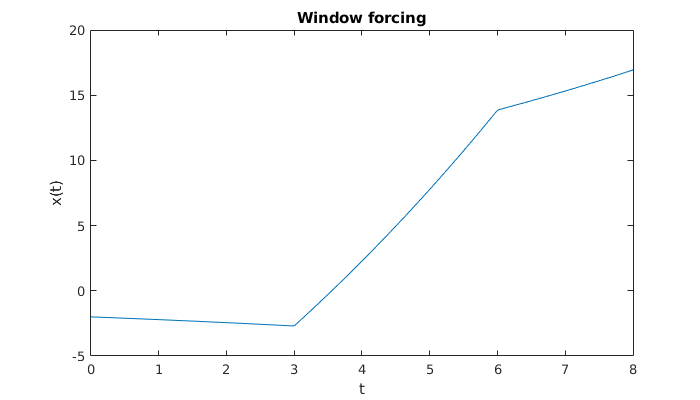

In [1]:
step = @(t) double(t>0);
dxdt = @(t,x) 0.1*x + 5*(step(t-3) - step(t-6));
[t,x] = ode23(dxdt,linspace(0,8,401),-2);
plot(t,x)
xlabel('t'), ylabel('x(t)')
title('Window forcing')

You can clearly see the jumps in $x'(t)$; at $t=3$, the slope increases by 1, and at $t=6$, it decreases by 1.

<div style="max-width:608px"><div style="position:relative;padding-bottom:66.118421052632%"><iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2358381/sp/235838100/embedIframeJs/uiconf_id/43030021/partner_id/2358381?iframeembed=true&playerId=kaltura_player&entry_id=1_4jozqgkp&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=1_hacx5k7n" width="608" height="402" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player" style="position:absolute;top:0;left:0;width:100%;height:100%"></iframe></div></div>